In [2]:
import pandas as pd

In [23]:
df = pd.read_excel('datasetmangrove.xlsx')
df

,NamaPantai,2018,2019,2020,2021,2022,2023
0,Pantai Tamban,20.726965,20.831120,20.935799,21.041004,21.146738,21.253003
1,Pantai Sempu,946.436659,947.953385,949.472541,950.994132,952.518161,954.044632
2,Pantai Goa Cina,5.584319,5.538350,5.492760,5.447546,5.402703,5.358230
3,Pantai Balekambang,214.818244,216.114934,217.419450,218.731841,220.052154,221.380437
4,Pantai Ngliyep,281.449183,277.016913,272.654442,268.360671,264.134519,259.974920
5,Pantai Sendang Biru,2475.914826,2526.443700,2578.003776,2630.616098,2684.302141,2739.083817
6,Pantai Jembatan Panjang,2.966040,2.941625,2.917410,2.893395,2.869577,2.845956
7,Pantai Kondang Merak,2.539286,2.564935,2.590844,2.617014,2.643448,2.670150
8,Pantai Bajul Mati,17.354955,17.212094,17.070410,16.929892,16.790530,16.652316
9,Pantai Modangan,3.519451,3.433611,3.349864,3.268160,3.188449,3.110682


In [24]:
# konversi ke satuan m2
df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: format(x * 10000, '.2f'))
df

,NamaPantai,2018,2019,2020,2021,2022,2023
0,Pantai Tamban,207269.65,208311.20,209357.99,210410.04,211467.38,212530.03
1,Pantai Sempu,9464366.59,9479533.85,9494725.41,9509941.32,9525181.61,9540446.32
2,Pantai Goa Cina,55843.19,55383.50,54927.60,54475.46,54027.03,53582.30
3,Pantai Balekambang,2148182.44,2161149.34,2174194.50,2187318.41,2200521.54,2213804.37
4,Pantai Ngliyep,2814491.83,2770169.13,2726544.42,2683606.71,2641345.19,2599749.20
5,Pantai Sendang Biru,24759148.26,25264437.00,25780037.76,26306160.98,26843021.41,27390838.17
6,Pantai Jembatan Panjang,29660.40,29416.25,29174.10,28933.95,28695.77,28459.56
7,Pantai Kondang Merak,25392.86,25649.35,25908.44,26170.14,26434.48,26701.50
8,Pantai Bajul Mati,173549.55,172120.94,170704.10,169298.92,167905.30,166523.16
9,Pantai Modangan,35194.51,34336.11,33498.64,32681.60,31884.49,31106.82


In [26]:
# melt untuk merubah kolom ke record 
df_melted = pd.melt(df, id_vars=['NamaPantai'], var_name='Tahun', value_name='Luas')
df_melted.to_csv('cleandataset.csv', index=False)

### Segmentasi berdasarkan luas mangrove

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('cleandataset.csv')
df.head(10)

,NamaPantai,Tahun,Luas
0,Pantai Tamban,2018,207269.65
1,Pantai Sempu,2018,9464366.59
2,Pantai Goa Cina,2018,55843.19
3,Pantai Balekambang,2018,2148182.44
4,Pantai Ngliyep,2018,2814491.83
5,Pantai Sendang Biru,2018,24759148.26
6,Pantai Jembatan Panjang,2018,29660.40
7,Pantai Kondang Merak,2018,25392.86
8,Pantai Bajul Mati,2018,173549.55
9,Pantai Modangan,2018,35194.51


In [54]:
# ambil tahun 2023 saja 
df2023 = df[df.Tahun == 2023]
df2023

,NamaPantai,Tahun,Luas
90,Pantai Tamban,2023,212530.03
91,Pantai Sempu,2023,9540446.32
92,Pantai Goa Cina,2023,53582.30
93,Pantai Balekambang,2023,2213804.37
94,Pantai Ngliyep,2023,2599749.20
95,Pantai Sendang Biru,2023,27390838.17
96,Pantai Jembatan Panjang,2023,28459.56
97,Pantai Kondang Merak,2023,26701.50
98,Pantai Bajul Mati,2023,166523.16
99,Pantai Modangan,2023,31106.82


In [55]:
X = df2023.drop(['Tahun','NamaPantai'], axis=1)
X

,Luas
90,212530.03
91,9540446.32
92,53582.30
93,2213804.37
94,2599749.20
95,27390838.17
96,28459.56
97,26701.50
98,166523.16
99,31106.82


In [56]:
n_clusters = 5

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df2023['Cluster'] = kmeans.fit_predict(X)

# Menampilkan hasil clustering
df2023[['NamaPantai', 'Tahun', 'Luas', 'Cluster']]


c:\Users\Faqih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faqih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Faqih\AppData\Local\Temp\ipykernel_5704\2944800639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['Cluster'] = kmeans.fit_predict(X)


,NamaPantai,Tahun,Luas,Cluster
90,Pantai Tamban,2023,212530.03,0
91,Pantai Sempu,2023,9540446.32,2
92,Pantai Goa Cina,2023,53582.30,0
93,Pantai Balekambang,2023,2213804.37,4
94,Pantai Ngliyep,2023,2599749.20,3
95,Pantai Sendang Biru,2023,27390838.17,1
96,Pantai Jembatan Panjang,2023,28459.56,0
97,Pantai Kondang Merak,2023,26701.50,0
98,Pantai Bajul Mati,2023,166523.16,0
99,Pantai Modangan,2023,31106.82,0


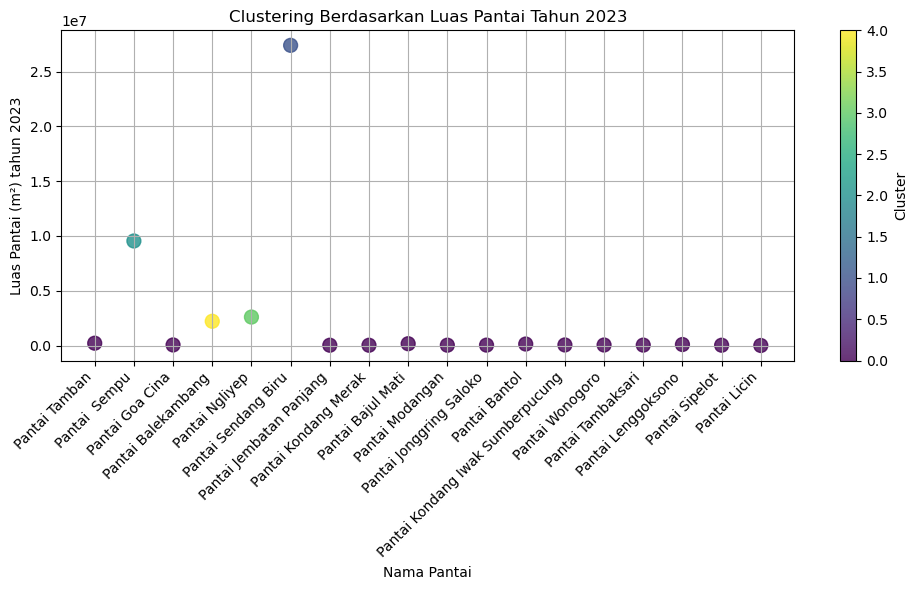

In [58]:
# Visualisasi hasil clustering dalam scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2023['NamaPantai'], df2023['Luas'], c=df2023['Cluster'], cmap='viridis', s=100, alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nama Pantai')
plt.ylabel('Luas Pantai (m²) tahun 2023')
plt.title('Clustering Berdasarkan Luas Pantai Tahun 2023')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

### EDA LAGIII

In [108]:
df = pd.read_csv('cleandataset.csv')

# Mengurutkan DataFrame berdasarkan NamaPantai dan Tahun
df.sort_values(by=['NamaPantai', 'Tahun'], inplace=True)


In [109]:
df

,NamaPantai,Tahun,Luas
1,Pantai Sempu,2018,9464366.59
19,Pantai Sempu,2019,9479533.85
37,Pantai Sempu,2020,9494725.41
55,Pantai Sempu,2021,9509941.32
73,Pantai Sempu,2022,9525181.61
...,...,...,...
31,Pantai Wonogoro,2019,49634.42
49,Pantai Wonogoro,2020,49225.84
67,Pantai Wonogoro,2021,48820.63
85,Pantai Wonogoro,2022,48418.76


In [110]:
# Menghitung selisih Luas dengan Tahun sebelumnya menggunakan groupby dan diff
df['Selisih_Luas'] = df.groupby('NamaPantai')['Luas'].diff()
df.head(20)

,NamaPantai,Tahun,Luas,Selisih_Luas
1,Pantai Sempu,2018,9464366.59,NaN
19,Pantai Sempu,2019,9479533.85,15167.26
37,Pantai Sempu,2020,9494725.41,15191.56
55,Pantai Sempu,2021,9509941.32,15215.91
73,Pantai Sempu,2022,9525181.61,15240.29
91,Pantai Sempu,2023,9540446.32,15264.71
8,Pantai Bajul Mati,2018,173549.55,NaN
26,Pantai Bajul Mati,2019,172120.94,-1428.61
44,Pantai Bajul Mati,2020,170704.10,-1416.84
62,Pantai Bajul Mati,2021,169298.92,-1405.18


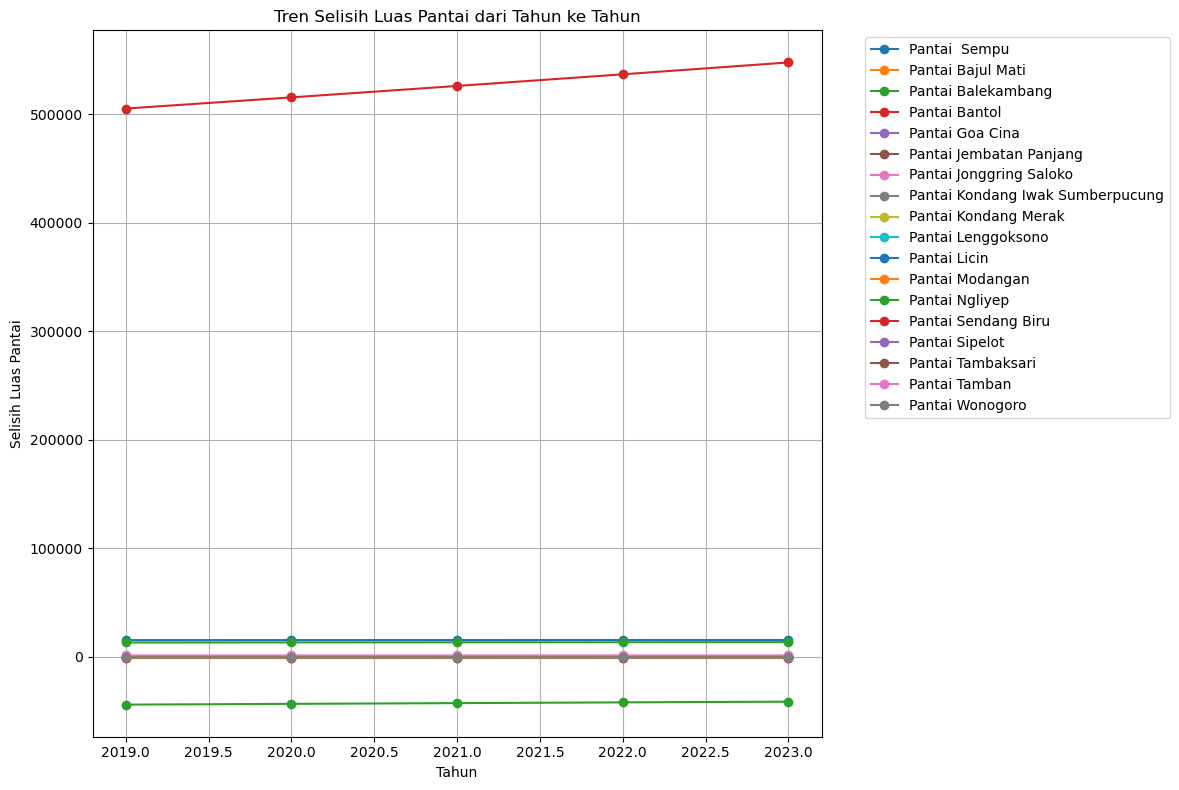

In [111]:
# Menampilkan tren selisih luas pantai dalam setiap tahun di setiap pantai
plt.figure(figsize=(12, 8))

# Loop untuk menampilkan tren untuk setiap pantai
for pantai, data_pantai in df.groupby('NamaPantai'):
    plt.plot(data_pantai['Tahun'], data_pantai['Selisih_Luas'], marker='o', label=pantai)

plt.xlabel('Tahun')
plt.ylabel('Selisih Luas Pantai')
plt.title('Tren Selisih Luas Pantai dari Tahun ke Tahun')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

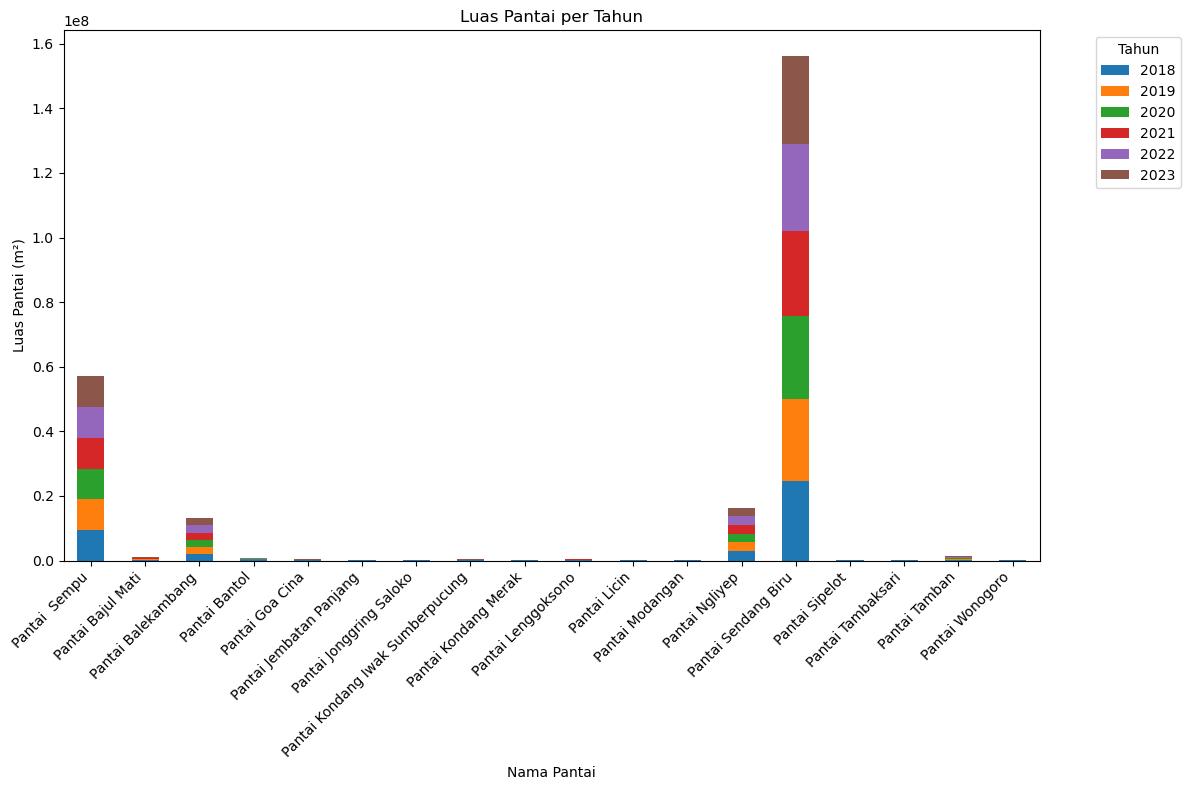

In [112]:
# Membuat pivot table dengan Tahun sebagai kolom
pivot_df = df.pivot(index='NamaPantai', columns='Tahun', values='Luas')

# Plotting stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# Menambahkan label dan judul plot
plt.xlabel('Nama Pantai')
plt.ylabel('Luas Pantai (m²)')
plt.title('Luas Pantai per Tahun')
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

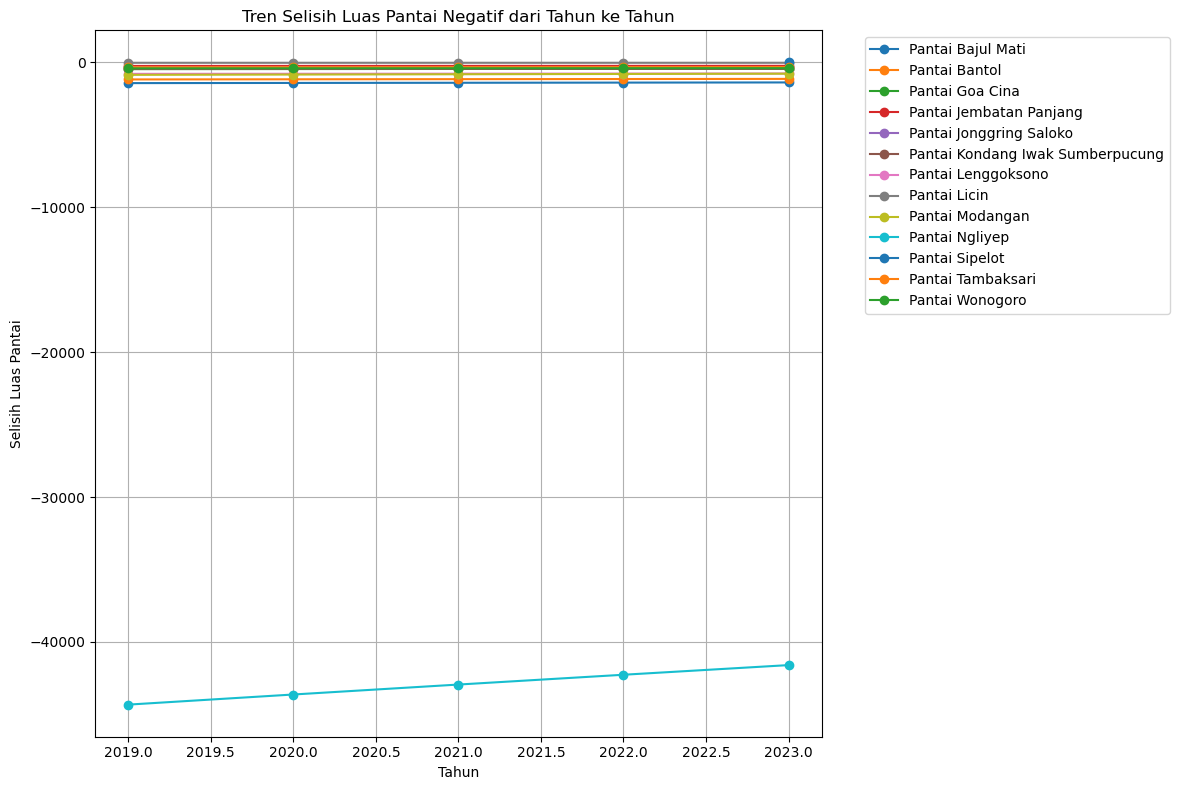

Pantai yang mengalami penurunan luas pantai: Pantai Bajul Mati, Pantai Bantol, Pantai Goa Cina, Pantai Jembatan Panjang, Pantai Jonggring Saloko, Pantai Kondang Iwak Sumberpucung, Pantai Lenggoksono, Pantai Licin, Pantai Modangan, Pantai Ngliyep, Pantai Sipelot, Pantai Tambaksari, Pantai Wonogoro


In [113]:
# fokus pada pantai yang mengalami pengurangan mangrove
# Filter hanya data dengan selisih negatif
df_negatif = df[df['Selisih_Luas'] < 0]

# Plotting tren selisih luas pantai yang negatif
plt.figure(figsize=(12, 8))

# Loop untuk menampilkan tren untuk setiap pantai dengan selisih negatif
for pantai, data_pantai in df_negatif.groupby('NamaPantai'):
    plt.plot(data_pantai['Tahun'], data_pantai['Selisih_Luas'], marker='o', label=pantai)

plt.xlabel('Tahun')
plt.ylabel('Selisih Luas Pantai')
plt.title('Tren Selisih Luas Pantai Negatif dari Tahun ke Tahun')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Menampilkan pantai-pantai yang mengalami penurunan luas pantai
pantai_penurunan = df_negatif['NamaPantai'].unique()
print(f"Pantai yang mengalami penurunan luas pantai: {', '.join(pantai_penurunan)}")

In [114]:
df_negatif

,NamaPantai,Tahun,Luas,Selisih_Luas
26,Pantai Bajul Mati,2019,172120.94,-1428.61
44,Pantai Bajul Mati,2020,170704.10,-1416.84
62,Pantai Bajul Mati,2021,169298.92,-1405.18
80,Pantai Bajul Mati,2022,167905.30,-1393.62
98,Pantai Bajul Mati,2023,166523.16,-1382.14
...,...,...,...,...
31,Pantai Wonogoro,2019,49634.42,-411.96
49,Pantai Wonogoro,2020,49225.84,-408.58
67,Pantai Wonogoro,2021,48820.63,-405.21
85,Pantai Wonogoro,2022,48418.76,-401.87


### Segmentasi pertumbungan / pengurangan tanah mangrove berdasarkan pantainya

In [124]:
df = df[df['Tahun'] != 2018]
df

,NamaPantai,Tahun,Luas,Selisih_Luas
19,Pantai Sempu,2019,9479533.85,15167.26
37,Pantai Sempu,2020,9494725.41,15191.56
55,Pantai Sempu,2021,9509941.32,15215.91
73,Pantai Sempu,2022,9525181.61,15240.29
91,Pantai Sempu,2023,9540446.32,15264.71
...,...,...,...,...
31,Pantai Wonogoro,2019,49634.42,-411.96
49,Pantai Wonogoro,2020,49225.84,-408.58
67,Pantai Wonogoro,2021,48820.63,-405.21
85,Pantai Wonogoro,2022,48418.76,-401.87


In [125]:
# Melakukan pivot untuk mengubah tahun menjadi kolom
df_pivot = df.pivot_table(index='NamaPantai', columns='Tahun', values=['Luas', 'Selisih_Luas'])

# Reset indeks untuk mendapatkan struktur yang diinginkan
df_pivot = df_pivot.reset_index()

# Mengganti nama kolom hasil pivot
df_pivot.columns = ['NamaPantai', 'Luas_2019', 'Luas_2020', 'Luas_2021', 'Luas_2022', 'Luas_2023',
                    'Selisih_Luas_2019', 'Selisih_Luas_2020', 'Selisih_Luas_2021', 'Selisih_Luas_2022', 'Selisih_Luas_2023']

# Menampilkan hasil
print(df_pivot)

                          NamaPantai    Luas_2019    Luas_2020    Luas_2021  \
0                      Pantai  Sempu   9479533.85   9494725.41   9509941.32   
1                  Pantai Bajul Mati    172120.94    170704.10    169298.92   
2                 Pantai Balekambang   2161149.34   2174194.50   2187318.41   
3                      Pantai Bantol    141596.81    140431.23    139275.25   
4                    Pantai Goa Cina     55383.50     54927.60     54475.46   
5            Pantai Jembatan Panjang     29416.25     29174.10     28933.95   
6            Pantai Jonggring Saloko     39702.01     39375.20     39051.08   
7   Pantai Kondang Iwak Sumberpucung     55205.52     54751.09     54300.40   
8               Pantai Kondang Merak     25649.35     25908.44     26170.14   
9                 Pantai Lenggoksono     95217.32     94433.52     93656.18   
10                      Pantai Licin      3228.59      3202.01      3175.66   
11                   Pantai Modangan     34336.11   

In [126]:
df_pivot

,NamaPantai,Luas_2019,Luas_2020,Luas_2021,Luas_2022,Luas_2023,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023
0,Pantai Sempu,9479533.85,9494725.41,9509941.32,9525181.61,9540446.32,15167.26,15191.56,15215.91,15240.29,15264.71
1,Pantai Bajul Mati,172120.94,170704.10,169298.92,167905.30,166523.16,-1428.61,-1416.84,-1405.18,-1393.62,-1382.14
2,Pantai Balekambang,2161149.34,2174194.50,2187318.41,2200521.54,2213804.37,12966.90,13045.16,13123.91,13203.13,13282.83
3,Pantai Bantol,141596.81,140431.23,139275.25,138128.78,136991.75,-1175.26,-1165.58,-1155.98,-1146.47,-1137.03
4,Pantai Goa Cina,55383.50,54927.60,54475.46,54027.03,53582.30,-459.69,-455.90,-452.14,-448.43,-444.73
5,Pantai Jembatan Panjang,29416.25,29174.10,28933.95,28695.77,28459.56,-244.15,-242.15,-240.15,-238.18,-236.21
6,Pantai Jonggring Saloko,39702.01,39375.20,39051.08,38729.62,38410.81,-329.53,-326.81,-324.12,-321.46,-318.81
7,Pantai Kondang Iwak Sumberpucung,55205.52,54751.09,54300.40,53853.41,53410.11,-458.21,-454.43,-450.69,-446.99,-443.30
8,Pantai Kondang Merak,25649.35,25908.44,26170.14,26434.48,26701.50,256.49,259.09,261.70,264.34,267.02
9,Pantai Lenggoksono,95217.32,94433.52,93656.18,92885.23,92120.63,-790.31,-783.80,-777.34,-770.95,-764.60


In [138]:
# clustering 
X = df_pivot[['Selisih_Luas_2019', 'Selisih_Luas_2020', 'Selisih_Luas_2021', 'Selisih_Luas_2022', 'Selisih_Luas_2023']]

# Menentukan jumlah cluster
n_clusters = 5

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pivot['Cluster'] = kmeans.fit_predict(X)

# Menampilkan hasil clustering
df_pivot[['NamaPantai', 'Selisih_Luas_2019', 'Selisih_Luas_2020', 'Selisih_Luas_2021', 'Selisih_Luas_2022', 'Selisih_Luas_2023','Cluster']]

c:\Users\Faqih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faqih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,NamaPantai,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023,Cluster
0,Pantai Sempu,15167.26,15191.56,15215.91,15240.29,15264.71,3
1,Pantai Bajul Mati,-1428.61,-1416.84,-1405.18,-1393.62,-1382.14,0
2,Pantai Balekambang,12966.90,13045.16,13123.91,13203.13,13282.83,3
3,Pantai Bantol,-1175.26,-1165.58,-1155.98,-1146.47,-1137.03,0
4,Pantai Goa Cina,-459.69,-455.90,-452.14,-448.43,-444.73,4
5,Pantai Jembatan Panjang,-244.15,-242.15,-240.15,-238.18,-236.21,4
6,Pantai Jonggring Saloko,-329.53,-326.81,-324.12,-321.46,-318.81,4
7,Pantai Kondang Iwak Sumberpucung,-458.21,-454.43,-450.69,-446.99,-443.30,4
8,Pantai Kondang Merak,256.49,259.09,261.70,264.34,267.02,4
9,Pantai Lenggoksono,-790.31,-783.80,-777.34,-770.95,-764.60,0


In [139]:
df_pivot.Cluster.value_counts()

Cluster
4    10
0     4
3     2
2     1
1     1
Name: count, dtype: int64

In [140]:
df_pivot[df_pivot.Cluster == 1]

,NamaPantai,Luas_2019,Luas_2020,Luas_2021,Luas_2022,Luas_2023,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023,Cluster
13,Pantai Sendang Biru,25264437.0,25780037.76,26306160.98,26843021.41,27390838.17,505288.74,515600.76,526123.22,536860.43,547816.76,1


- pertumbuhan mangrove di cluster 1 tinggi banget

In [141]:
df_pivot[df_pivot.Cluster == 2]

,NamaPantai,Luas_2019,Luas_2020,Luas_2021,Luas_2022,Luas_2023,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023,Cluster
12,Pantai Ngliyep,2770169.13,2726544.42,2683606.71,2641345.19,2599749.2,-44322.7,-43624.71,-42937.71,-42261.52,-41595.99,2


- pertumbuhan mangrove di cluster 2 negatif banget

In [143]:
df_pivot[df_pivot.Cluster == 3]

,NamaPantai,Luas_2019,Luas_2020,Luas_2021,Luas_2022,Luas_2023,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023,Cluster
0,Pantai Sempu,9479533.85,9494725.41,9509941.32,9525181.61,9540446.32,15167.26,15191.56,15215.91,15240.29,15264.71,3
2,Pantai Balekambang,2161149.34,2174194.50,2187318.41,2200521.54,2213804.37,12966.90,13045.16,13123.91,13203.13,13282.83,3


- pertumbuhan mangrove di cluster 3 cukup tinggi

In [144]:
df_pivot[df_pivot.Cluster == 0]

,NamaPantai,Luas_2019,Luas_2020,Luas_2021,Luas_2022,Luas_2023,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023,Cluster
1,Pantai Bajul Mati,172120.94,170704.10,169298.92,167905.30,166523.16,-1428.61,-1416.84,-1405.18,-1393.62,-1382.14,0
3,Pantai Bantol,141596.81,140431.23,139275.25,138128.78,136991.75,-1175.26,-1165.58,-1155.98,-1146.47,-1137.03,0
9,Pantai Lenggoksono,95217.32,94433.52,93656.18,92885.23,92120.63,-790.31,-783.80,-777.34,-770.95,-764.60,0
11,Pantai Modangan,34336.11,33498.64,32681.60,31884.49,31106.82,-858.40,-837.47,-817.04,-797.11,-777.67,0


- pertumbuhan mangrove di cluster 0 cukup negatif

In [149]:
df_pivot[df_pivot.Cluster == 4]

,NamaPantai,Luas_2019,Luas_2020,Luas_2021,Luas_2022,Luas_2023,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023,Cluster,ClusterPCA
4,Pantai Goa Cina,55383.50,54927.60,54475.46,54027.03,53582.30,-459.69,-455.90,-452.14,-448.43,-444.73,4,4
5,Pantai Jembatan Panjang,29416.25,29174.10,28933.95,28695.77,28459.56,-244.15,-242.15,-240.15,-238.18,-236.21,4,4
6,Pantai Jonggring Saloko,39702.01,39375.20,39051.08,38729.62,38410.81,-329.53,-326.81,-324.12,-321.46,-318.81,4,4
7,Pantai Kondang Iwak Sumberpucung,55205.52,54751.09,54300.40,53853.41,53410.11,-458.21,-454.43,-450.69,-446.99,-443.30,4,4
8,Pantai Kondang Merak,25649.35,25908.44,26170.14,26434.48,26701.50,256.49,259.09,261.70,264.34,267.02,4,4
10,Pantai Licin,3228.59,3202.01,3175.66,3149.52,3123.59,-26.80,-26.58,-26.35,-26.14,-25.93,4,4
14,Pantai Sipelot,28701.00,28701.00,28701.00,28701.00,28699.00,0.00,0.00,0.00,0.00,-2.00,4,4
15,Pantai Tambaksari,40020.90,39691.47,39364.74,39040.70,38719.33,-332.18,-329.43,-326.73,-324.04,-321.37,4,4
16,Pantai Tamban,208311.20,209357.99,210410.04,211467.38,212530.03,1041.55,1046.79,1052.05,1057.34,1062.65,4,4
17,Pantai Wonogoro,49634.42,49225.84,48820.63,48418.76,48020.19,-411.96,-408.58,-405.21,-401.87,-398.57,4,4


- pertumbuhan mangrove di cluster 4 negatif rendah
- tapi ada yang aneh Pantai Tamban masuk di cluster ini wkwk

### Clustering ft PCA

In [151]:
df_pivot['ClusterPCA']

0     3
1     0
2     3
3     0
4     4
5     4
6     4
7     4
8     4
9     0
10    4
11    0
12    2
13    1
14    4
15    4
16    4
17    4
Name: ClusterPCA, dtype: int32

In [152]:
df_pivot[['Selisih_Luas_2019', 'Selisih_Luas_2020', 'Selisih_Luas_2021', 'Selisih_Luas_2022', 'Selisih_Luas_2023']]

,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023
0,15167.26,15191.56,15215.91,15240.29,15264.71
1,-1428.61,-1416.84,-1405.18,-1393.62,-1382.14
2,12966.90,13045.16,13123.91,13203.13,13282.83
3,-1175.26,-1165.58,-1155.98,-1146.47,-1137.03
4,-459.69,-455.90,-452.14,-448.43,-444.73
5,-244.15,-242.15,-240.15,-238.18,-236.21
6,-329.53,-326.81,-324.12,-321.46,-318.81
7,-458.21,-454.43,-450.69,-446.99,-443.30
8,256.49,259.09,261.70,264.34,267.02
9,-790.31,-783.80,-777.34,-770.95,-764.60


In [154]:
principal_components[:, 1]

array([-1131.92657648,  -132.47098817,  -828.43010099,  -154.56916063,
        -216.99167923,  -235.79839643,  -228.35142487,  -217.12371936,
        -265.15251599,  -188.15054456,  -254.75876008,  -142.16251185,
        4584.25243199,   425.48890421,  -258.33971663,  -228.11898746,
        -306.23545092,  -221.16080255])

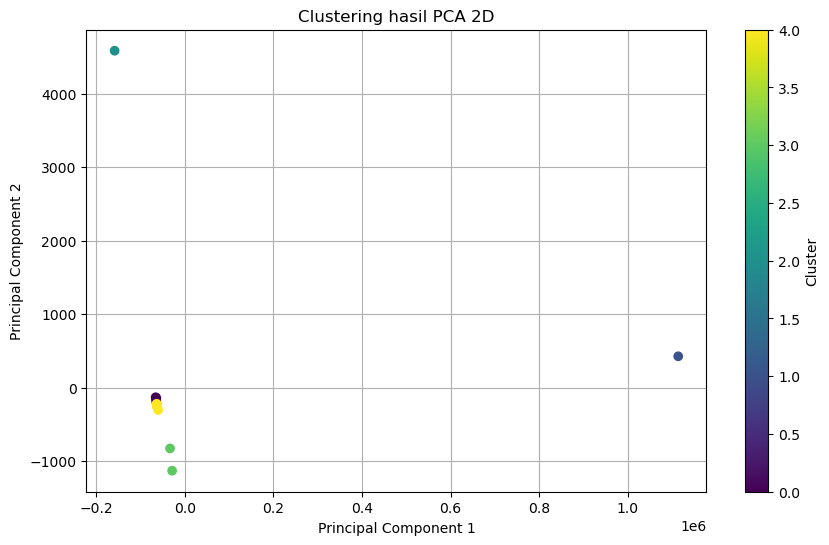

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Memilih kolom untuk clustering
X = df_pivot[['Selisih_Luas_2019', 'Selisih_Luas_2020', 'Selisih_Luas_2021', 'Selisih_Luas_2022', 'Selisih_Luas_2023']]

# Mengaplikasikan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Visualisasi hasil clustering dengan PCA 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df_pivot['ClusterPCA'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering hasil PCA 2D')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [177]:
df_pivot.to_excel("finaldataold.xlsx", index=False)

## Web app

In [5]:

df = pd.read_excel('finaldata.xlsx')
df.head()

,NamaPantai,Luas_2019,Luas_2020,Luas_2021,Luas_2022,Luas_2023,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023,Cluster,ClusterPCA,Koordinat
0,Pantai Sempu,9479533.85,9494725.41,9509941.32,9525181.61,9540446.32,15167.26,15191.56,15215.91,15240.29,15264.71,3,3,Longitude\t: 112.7018\nLatitude\t: -7.46659
1,Pantai Bajul Mati,172120.94,170704.10,169298.92,167905.30,166523.16,-1428.61,-1416.84,-1405.18,-1393.62,-1382.14,0,0,Longitude\t: 112.51150596534\nLatitude\t: -7.2...
2,Pantai Balekambang,2161149.34,2174194.50,2187318.41,2200521.54,2213804.37,12966.90,13045.16,13123.91,13203.13,13282.83,3,3,Longitude\t: 112.6034239139\nLatitude\t: -7.96...
3,Pantai Bantol,141596.81,140431.23,139275.25,138128.78,136991.75,-1175.26,-1165.58,-1155.98,-1146.47,-1137.03,0,0,Longitude\t: 112.6094945\nLatitude\t: -7.954794
4,Pantai Goa Cina,55383.50,54927.60,54475.46,54027.03,53582.30,-459.69,-455.90,-452.14,-448.43,-444.73,4,4,Longitude\t: 112.037134165\nLatitude\t: -8.027...


In [6]:
import re

def extract_coordinates(coord_text):
    # Menghapus \t, \n, :, dan spasi dari teks
    cleaned_text = re.sub(r'[\t\n: ]', '', coord_text)
    
    # Pola regular expression untuk mencocokkan nilai Longitude dan Latitude
    pattern = r"Longitude(\d+\.\d+)Latitude(-?\d+\.\d+)"
    matches = re.search(pattern, cleaned_text)
    
    if matches:
        longitude = float(matches.group(1))
        latitude = float(matches.group(2))
        return pd.Series({'Longitude': longitude, 'Latitude': latitude})
    else:
        return pd.Series({'Longitude': None, 'Latitude': None})

In [7]:

# Terapkan fungsi ke kolom 'Koordinat' dan tambahkan hasilnya sebagai kolom baru
df[['Longitude', 'Latitude']] = df['Koordinat'].apply(extract_coordinates)

# Tampilkan DataFrame hasilnya
df

,NamaPantai,Luas_2019,Luas_2020,Luas_2021,Luas_2022,Luas_2023,Selisih_Luas_2019,Selisih_Luas_2020,Selisih_Luas_2021,Selisih_Luas_2022,Selisih_Luas_2023,Cluster,ClusterPCA,Koordinat,Longitude,Latitude
0,Pantai Sempu,9479533.85,9494725.41,9509941.32,9525181.61,9540446.32,15167.26,15191.56,15215.91,15240.29,15264.71,3,3,Longitude\t: 112.7018\nLatitude\t: -7.46659,112.701800,-7.466590
1,Pantai Bajul Mati,172120.94,170704.10,169298.92,167905.30,166523.16,-1428.61,-1416.84,-1405.18,-1393.62,-1382.14,0,0,Longitude\t: 112.51150596534\nLatitude\t: -7.2...,112.511506,-7.229879
2,Pantai Balekambang,2161149.34,2174194.50,2187318.41,2200521.54,2213804.37,12966.90,13045.16,13123.91,13203.13,13282.83,3,3,Longitude\t: 112.6034239139\nLatitude\t: -7.96...,112.603424,-7.963951
3,Pantai Bantol,141596.81,140431.23,139275.25,138128.78,136991.75,-1175.26,-1165.58,-1155.98,-1146.47,-1137.03,0,0,Longitude\t: 112.6094945\nLatitude\t: -7.954794,112.609494,-7.954794
4,Pantai Goa Cina,55383.50,54927.60,54475.46,54027.03,53582.30,-459.69,-455.90,-452.14,-448.43,-444.73,4,4,Longitude\t: 112.037134165\nLatitude\t: -8.027...,112.037134,-8.027892
5,Pantai Jembatan Panjang,29416.25,29174.10,28933.95,28695.77,28459.56,-244.15,-242.15,-240.15,-238.18,-236.21,4,4,Longitude\t: 112.65934\nLatitude\t: -8.26647,112.659340,-8.266470
6,Pantai Jonggring Saloko,39702.01,39375.20,39051.08,38729.62,38410.81,-329.53,-326.81,-324.12,-321.46,-318.81,4,4,Longitude\t: 112.53021240234\nLatitude\t: -8.4...,112.530212,-8.402074
7,Pantai Kondang Iwak Sumberpucung,55205.52,54751.09,54300.40,53853.41,53410.11,-458.21,-454.43,-450.69,-446.99,-443.30,4,4,Longitude\t: 112.7156779\nLatitude\t: -7.9588961,112.715678,-7.958896
8,Pantai Kondang Merak,25649.35,25908.44,26170.14,26434.48,26701.50,256.49,259.09,261.70,264.34,267.02,4,4,Longitude\t: 112.60025840336\nLatitude\t: -7.9...,112.600258,-7.942824
9,Pantai Lenggoksono,95217.32,94433.52,93656.18,92885.23,92120.63,-790.31,-783.80,-777.34,-770.95,-764.60,0,0,Longitude : 112.359496\nLatitude : -8.348821,112.359496,-8.348821


In [8]:
import folium

In [11]:
# Buat peta awal dengan koordinat tengah
map_center = [-7.9, 112.5]  # Koordinat tengah peta
m = folium.Map(location=map_center, zoom_start=10)

# Definisikan mapping untuk warna atau ikon berdasarkan cluster
cluster_colors = {
    0: 'red',
    1: 'green',
    2: 'black',
    3: 'blue',
    4: 'orange'
}

# Tambahkan marker untuk setiap titik koordinat
for index, row in df.iterrows():
    cluster = row['Cluster']
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['NamaPantai'],
        icon=folium.Icon(color=cluster_colors[cluster], icon='cloud')
    ).add_to(m)

# Tampilkan peta
m.save('index.html')  # Simpan peta sebagai file HTML